In [24]:
import pandas as pd

# Load the CSV file
file_path = 'thefinaldataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015,23.178,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,157.60,NaN
1,Ahmedabad,02-01-2015,27.004,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,77.76,NaN
2,Ahmedabad,03-01-2015,124.010,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,240.07,NaN
3,Ahmedabad,04-01-2015,40.012,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,94.91,NaN
4,Ahmedabad,05-01-2015,142.728,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,370.72,NaN


In [25]:
# Get an overview of the dataset
data.info()

# Check for missing values
data.isnull().sum()

# If there are missing values, you can either drop or fill them
# Example: Drop rows with missing values
data = data.dropna()

# If the dataset contains city names and AQI values, we’ll extract those specific columns
# For instance, assuming 'City' and 'AQI' are the relevant columns:
cities_aqi = data[['City', 'AQI']]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       29531 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          29531 non-null  float64
 5   NO2         29531 non-null  float64
 6   NOx         29531 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          29531 non-null  float64
 9   SO2         29531 non-null  float64
 10  O3          29531 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         29531 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [26]:
# Group by city and calculate mean AQI
city_aqi_mean = cities_aqi.groupby('City')['AQI'].mean().sort_values()

# Display the mean AQI for each city
city_aqi_mean


,AQI
City,
Ernakulam,92.598684
Chandigarh,93.211073
Amaravati,100.586989
Hyderabad,104.868437
Kolkata,113.979695
Visakhapatnam,117.190933
Amritsar,122.545838
Gurugram,127.966387
Patna,169.356021


<ipython-input-27-6eda8b086e33>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




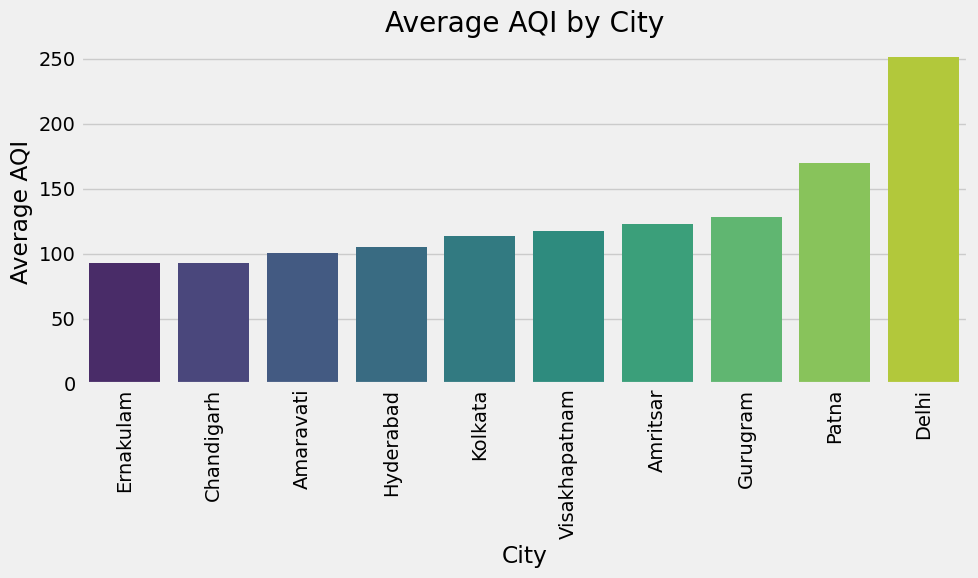

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot size
plt.figure(figsize=(10, 6))

# Create a bar plot of AQI for each city
sns.barplot(x=city_aqi_mean.index, y=city_aqi_mean.values, palette="viridis")

# Add labels and title
plt.xlabel('City')
plt.ylabel('Average AQI')
plt.title('Average AQI by City')
plt.xticks(rotation=90)  # Rotate the city names for readability

# Show the plot
plt.tight_layout()
plt.show()


<ipython-input-28-7bf316a84dfc>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




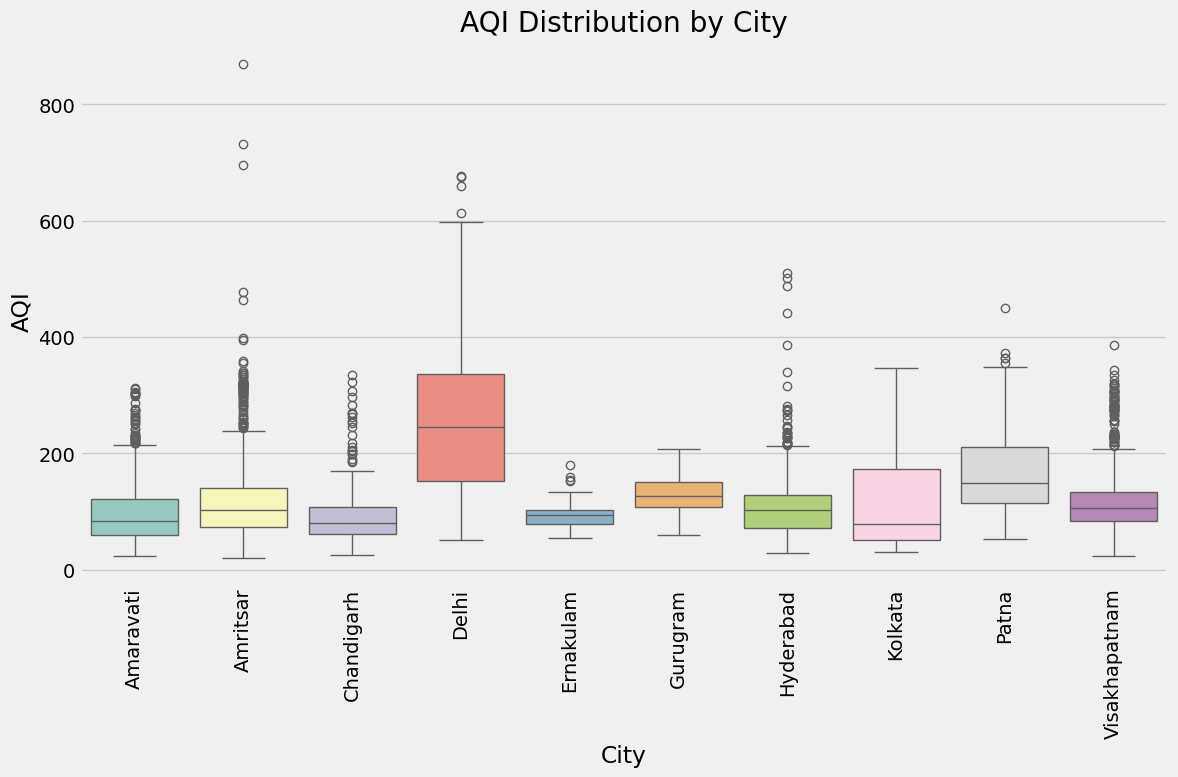

In [28]:
# Create a boxplot to compare AQI distribution in different cities
plt.figure(figsize=(12, 8))
sns.boxplot(x='City', y='AQI', data=cities_aqi, palette="Set3")
plt.xticks(rotation=90)
plt.title('AQI Distribution by City')
plt.tight_layout()
plt.show()
